# Stance Analysis

## Preprocessing

In [100]:
import pandas as pd
import os
import json
from pprint import pprint
from collections import Counter
import ast
import numpy as np
np.random.seed(0) 

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale = 2)
import os.path as path

root = path.abspath(path.join(os.getcwd(),"../.."))


visualizations_path = root+'/reports/visualizations'


print(visualizations_path)


df = pd.read_csv(root+'/data/raw/Webis-argument-framing.csv')

def binarize(row):
    if row!='Pro':
        return 0
    else:
        return 1
    

df['stance_id'] = df['stance'].apply(binarize)
df['argument'] = df[['premise', 'conclusion']].agg('\n'.join, axis=1).str.lower()


df

/Users/user/differential-bias/reports/visualizations


,argument_id,frame_id,frame,topic_id,topic,premise,stance,conclusion,stance_id,argument
0,0,0,economics,0,$700 billion US economic bailout,U.S. Treasury Secretary Henry Paulson summariz...,Pro,Not passing $700b bailout risks sending econom...,1,u.s. treasury secretary henry paulson summariz...
1,1,0,economics,0,$700 billion US economic bailout,"""Job security: Safeguarding jobs across the e...",Pro,$700b bailout helps avoid widespread bankruptc...,1,"""job security: safeguarding jobs across the e..."
2,2,0,economics,0,$700 billion US economic bailout,Treasury Secretary Henry Paulson summarized th...,Pro,$700b bailout is generally well designed to so...,1,treasury secretary henry paulson summarized th...
3,3,0,economics,0,$700 billion US economic bailout,"""Paulson Plan provides a plan Just as optimis...",Pro,$700b bailout offers buyer for frozen mortgage...,1,"""paulson plan provides a plan just as optimis..."
4,4,0,economics,0,$700 billion US economic bailout,"""The Treasury proposal to rescue the financia...",Pro,Most economists support the $700b US economic ...,1,"""the treasury proposal to rescue the financia..."
...,...,...,...,...,...,...,...,...,...,...
12321,14110,1622,endangered,1823,Zoos,While some argue that zoos are a means to prot...,Pro,Most of the animals that you see in zoos aren'...,1,while some argue that zoos are a means to prot...
12322,14111,1622,endangered,1823,Zoos,According to the World Conservation Union whic...,Pro,Zoos are not capable of sustaining all endange...,1,according to the world conservation union whic...
12323,14112,1622,endangered,1823,Zoos,Zoos are a good place to house endangered spec...,Con,Zoos help protect endangered species.,0,zoos are a good place to house endangered spec...
12324,14113,1622,endangered,1823,Zoos,If natural or human factors have made a specie...,Con,Zoos help breed endangered animals.,0,if natural or human factors have made a specie...


In [2]:
top_pro_con_distro = pd.crosstab([df["stance"]], df["topic"], margins = True).T.sort_values(by='All', ascending=False, na_position='first').head(30)

bottom_pro_con_distro = pd.crosstab([df["stance"]], df["topic"], margins = True).T.sort_values(by='All', ascending=False, na_position='first').tail(30)

# top_pro_con_distro = pd.crosstab([df["stance"]], df["topic"], margins = True).T.sort_values(by='All', ascending=False, na_position='first').head(30).style.background_gradient(cmap = "ocean_r")
# bottom_pro_con_distro = pd.crosstab([df["stance"]], df["topic"], margins = True).T.sort_values(by='All', ascending=False, na_position='first').tail(30).style.background_gradient(cmap = "ocean_r")
# newdf = pd.crosstab([df["stance"]], df["topic"], margins = True).T.sort_values(by='All', ascending=False, na_position='first')

## Table with the top distribution of stance

In [3]:
top_pro_con_distro

stance,Con,Pro,All
topic,,,
All,6111,6215,12326
Abortion,76,61,137
Withdrawing from Iraq,56,72,128
Single-payer universal health care,63,64,127
Death penalty,59,62,121
Tibet independence,58,54,112
Capitalism vs socialism,61,47,108
Public health insurance option,43,57,100
Infant male circumcision,54,45,99


## Table with the bottom distribution of stance

In [4]:
bottom_pro_con_distro

stance,Con,Pro,All
topic,,,
Armed police,1,1,2
4-team college football playoff,1,1,2
Devolution in Scotland and Wales,1,1,2
Should school funding be based on academic achievement?,1,1,2
Should war be televised?,1,1,2
Aid for persecuted churches,0,2,2
Progressive tax system,2,0,2
Fashion is harmful,0,2,2
Ticket scalping,1,1,2


In [5]:
counts = pd.DataFrame(df['topic'].value_counts().head(30))
counts.reset_index(level=0, inplace=True)
counts= counts.rename(columns={'index': 'topic', 'topic': 'count'})
counts

,topic,count
0,Abortion,137
1,Withdrawing from Iraq,128
2,Single-payer universal health care,127
3,Death penalty,121
4,Tibet independence,112
5,Capitalism vs socialism,108
6,Public health insurance option,100
7,Infant male circumcision,99
8,Gay marriage,95
9,Animal testing,94


#

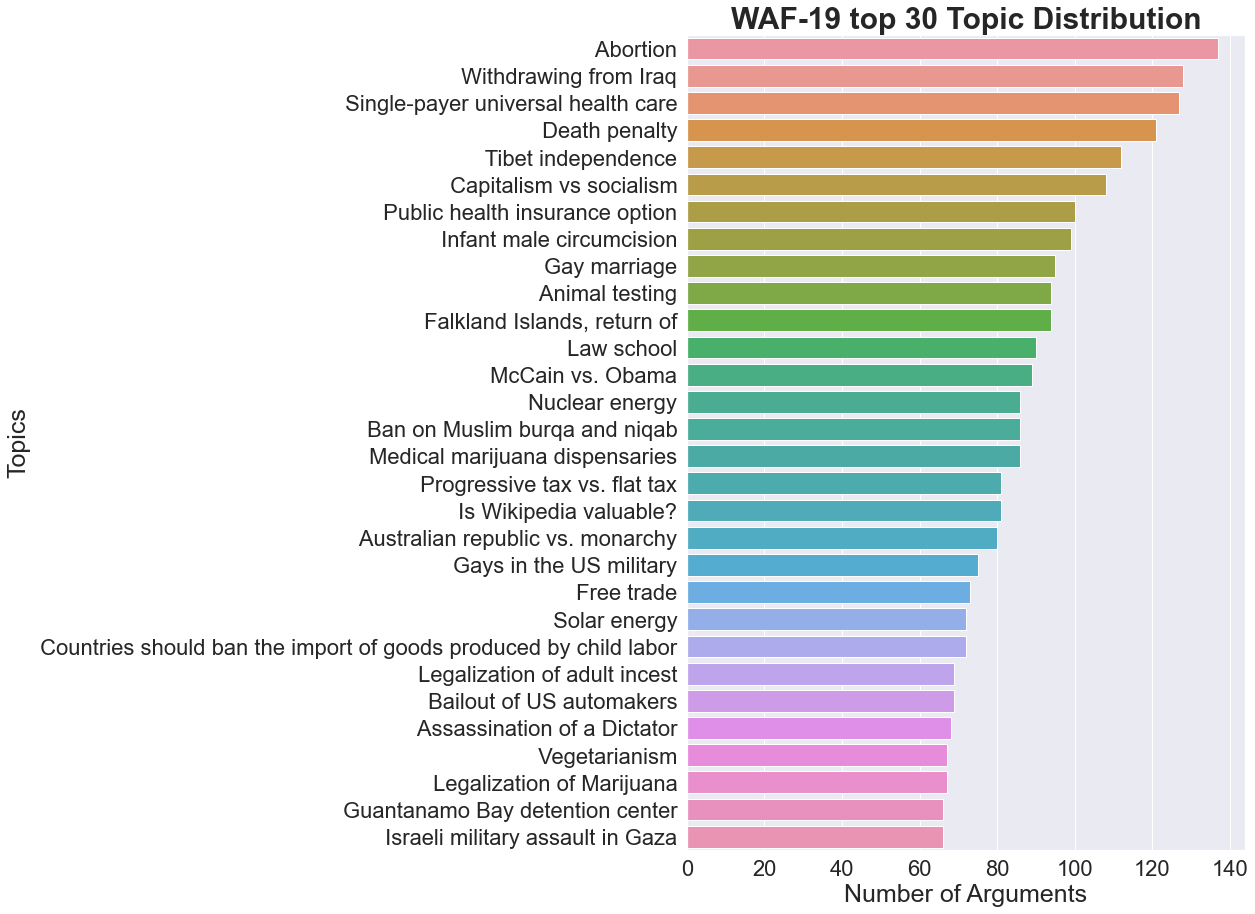

In [6]:


# plot figure
plt.figure(figsize=(10, 15))
ax = sns.barplot(x='count', y='topic', data=counts,  orient = 'h')
ax.set_xlabel('Number of Arguments', fontsize=25)
ax.set_ylabel('Topics', fontsize=25)


ax.axes.set_title("WAF-19 top 30 Topic Distribution",weight='bold', ha='center',fontsize=30)

# get label text
_, ylabels = plt.yticks()
_, xlabels = plt.xticks()
plt.savefig(visualizations_path+'/topic_distribution.png', bbox_inches = 'tight')
plt.show()

                frame  count
0           economics    664
1              rights    244
2           democracy    164
3         feasibility    143
4         environment    130
5      public opinion    116
6               crime    104
7      global warming    101
8            morality     96
9              health     92
10           security     91
11             safety     74
12  international law     73
13        free speech     72
14           religion     71
15           politics     70
16             social     69
17           efficacy     69
18           equality     68
19       human rights     65
20              abuse     65
21          education     63
22             choice     58
23        enforcement     54
24        competition     54
25     accountability     52
26            quality     49
27      effectiveness     48
28              costs     48
29          stability     47


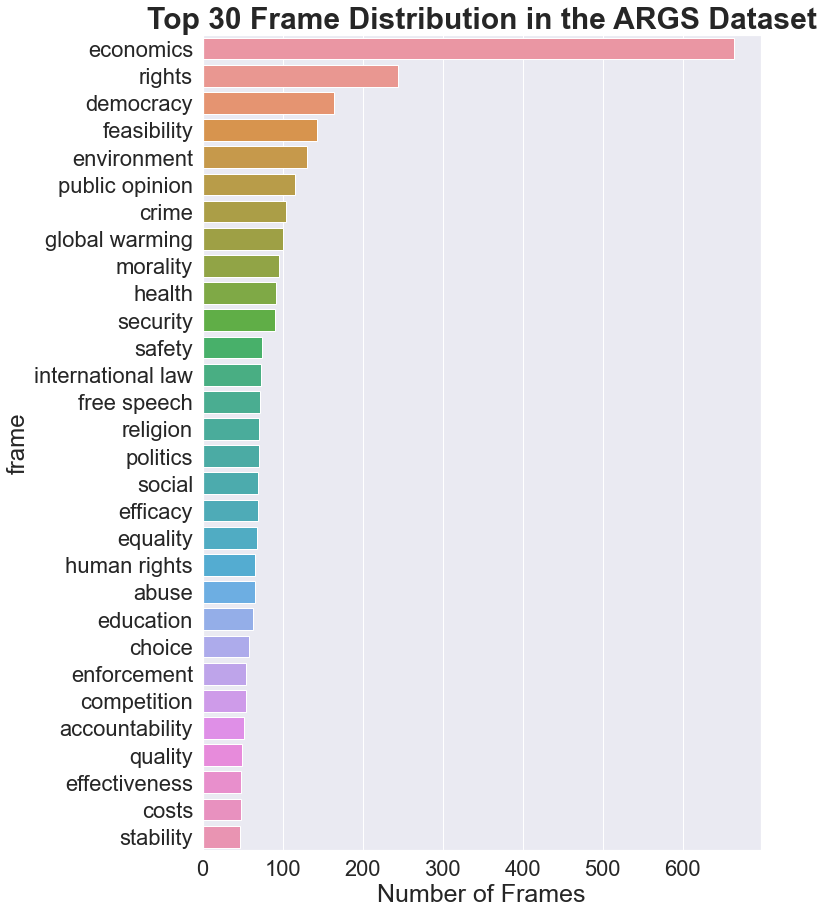

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

counts = pd.DataFrame(df['frame'].value_counts().head(30))
counts.reset_index(level=0, inplace=True)
counts= counts.rename(columns={'index': 'frame', 'frame': 'count'})
print(counts)

# plot figure
plt.figure(figsize=(10, 15))
ax = sns.barplot(x='count', y='frame', data=counts,  orient = 'h')
ax.set_xlabel('Number of Frames', fontsize=25)
ax.axes.set_title("Top 30 Frame Distribution in the ARGS Dataset",weight='bold', ha='center',fontsize=30)

# get label text
_, ylabels = plt.yticks()
_, xlabels = plt.xticks()
plt.savefig(visualizations_path+'/frame_distribution.png', bbox_inches = 'tight')
plt.show()

## Pro/Con distros

In [138]:

def plot_pro_con_distro(param,df, path):

    frame_counts = pd.DataFrame(df[param].value_counts().head(10))
    frame_counts.reset_index(level=0, inplace=True)
    frame_counts = frame_counts.rename(columns={'index': param, param: 'count'})

    to_filter = frame_counts[param].tolist()

    top_25_topics = df[df[param].isin(to_filter)]    
    top_25_topics = top_25_topics[[param, "stance"]]
    
    temp_df = pd.crosstab(top_25_topics[param], top_25_topics['stance'])
    temp_df['Total'] = temp_df.apply(lambda row: row.Pro + row.Con, axis=1)
    temp_df = temp_df.sort_values('Total')

    temp_df['topic'] = temp_df.index
    temp_df=temp_df.reset_index(drop=True)
    temp_df=temp_df[['topic','Con', 'Pro', 'Total']]
    df_total= temp_df['Total']

    a_df = temp_df.iloc[:, 0:3]
    ax = a_df.plot(x = 'topic', kind='barh',stacked = True, mark_right = True, colormap='Pastel2')

    df_rel = a_df[a_df.columns[1:]].div(df_total, 0)*100
    
    

    for n in df_rel:
        for i, (cs, ab, pc, tot) in enumerate(zip(a_df.iloc[:, 1:].cumsum(1)[n], a_df[n], df_rel[n], df_total)):
            plt.text(tot, i, str(tot), va='center', fontsize=18)
            plt.text(cs - ab/2, i, str(np.round(pc, 1)) + '%', va='center', ha='center',fontsize=18)
        
    
    
        
    ax.set_xlabel('Number of Arguments' , fontsize=30)
    ax.set_ylabel(str(param).title(), fontsize=30)
    #ax.axes.set_title("Top 10 {}/Stance Distribution in WAF-19".format(str(param).title()),
    #weight='bold', ha='center',fontsize=30)
    
    # get label text
    _, ylabels = plt.yticks(fontsize=30)
    _, xlabels = plt.xticks(fontsize=20)
    plt.legend(title="Stance", fontsize=25, title_fontsize=25)
    plt.savefig(visualizations_path+'/pro_con_'+param+'_distro.png', bbox_inches = 'tight', dpi=300)
    plt.rcParams["figure.figsize"] = (15, 10)





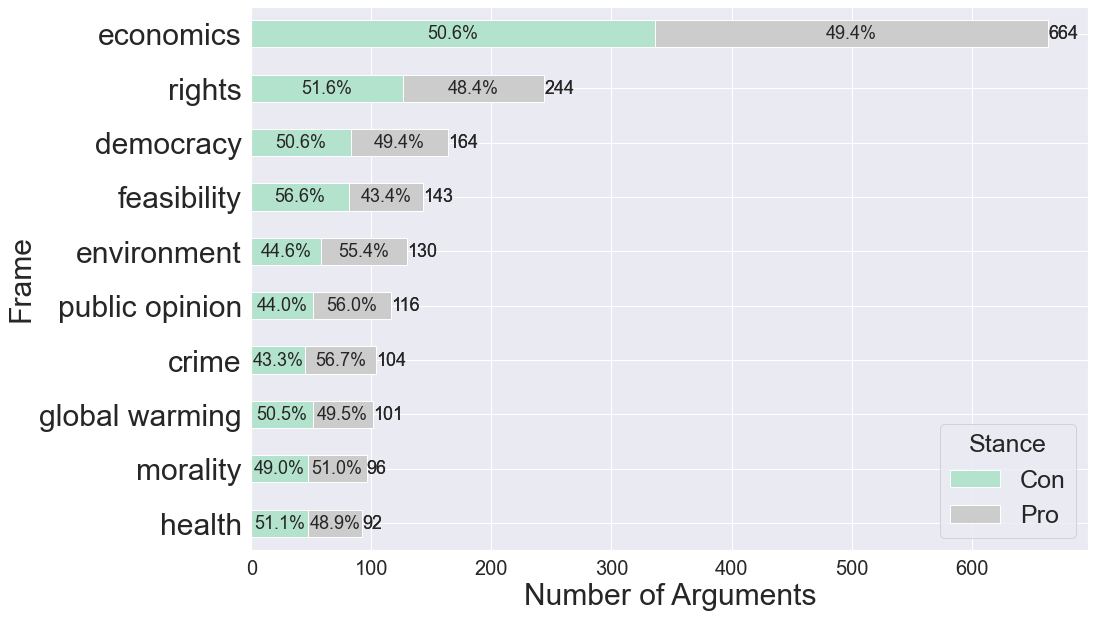

In [139]:
plot_pro_con_distro('frame',df, visualizations_path)

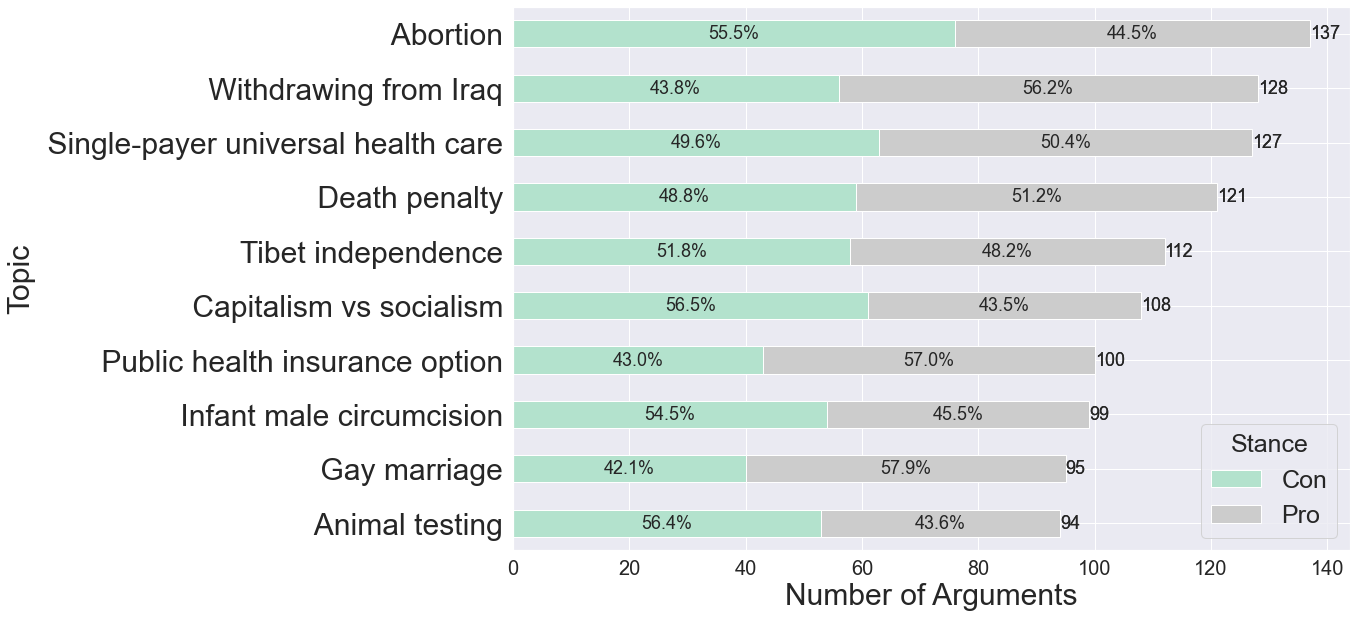

In [140]:
plot_pro_con_distro('topic',df, visualizations_path)